In [1]:
from pyevolve import G1DList
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import Mutators
from pyevolve import Statistics
from pyevolve import Crossovers
from pyevolve import Consts
from geopy.distance import geodesic
import matplotlib.pyplot as plt 
import random

In [2]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 
       17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 
       96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

In [3]:
cities = list(zip(LAT, LON))

In [4]:
#Compute the distance between two city
def distanceTwoCities(city1, city2):
    return geodesic(city1, city2).km

In [5]:
#Compute the total path between cities
def distTotPath(listCities):
    distance = 0.0
    for i in range(0,len(listCities)-1):
        distance += distanceTwoCities(cities[listCities[i]],cities[listCities[i+1]])
    distance += distanceTwoCities(cities[listCities[0]],cities[listCities[len(listCities)-1]])
    return distance

In [6]:
ft_evolve = []

def fitness(chromosome):
    dst = distTotPath(chromosome)
    ft_evolve.append(dst)
    return dst

In [7]:
def G1DListCustomInitializator(genome, **args):
    lst = [i for i in range(genome.getListSize())]
    random.shuffle(lst)
    genome.setInternalList(lst)

In [8]:
# Chromosome representation

# genome = List of elements
genome = G1DList.G1DList(len(cities))
# elements = values in the range rangemin and rangemax
genome.setParams(rangemin=0, rangemax=len(cities)-1)

# how to compute the fitness
genome.evaluator.set(fitness)
genome.mutator.set(Mutators.G1DListMutatorSwap)
genome.crossover.set(Crossovers.G1DListCrossoverEdge)
genome.initializator.set(G1DListCustomInitializator)


# GA initialisation
ga = GSimpleGA.GSimpleGA(genome)
ga.selector.set(Selectors.GTournamentSelector)
#Minimize the result
ga.setMinimax(Consts.minimaxType["minimize"])
ga.setGenerations(200)
ga.setCrossoverRate(0.7)
ga.setMutationRate(0.01)
ga.setPopulationSize(90)
ga.setElitism(True)

ga.evolve(freq_stats=50)

# Final best solution
best = ga.bestIndividual()

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw)             [7885.28(8196.43)/5190.26(4863.35)/6571.07(6571.07)]
Gen. 50 (25.00%): Max/Min/Avg Fitness(Raw)             [5416.73(5972.80)/3791.65(3346.76)/4513.94(4513.94)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw)             [5563.48(6706.59)/4058.72(3346.76)/4636.23(4636.23)]
Gen. 150 (75.00%): Max/Min/Avg Fitness(Raw)             [5731.21(6611.42)/4032.19(3346.76)/4776.00(4776.00)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw)             [5477.98(6356.54)/3944.17(3346.76)/4564.98(4564.98)]
Total time elapsed: 39.530 seconds.


[12, 7, 10, 8, 9, 0, 1, 13, 2, 3, 4, 5, 11, 6]
3346.761974038629


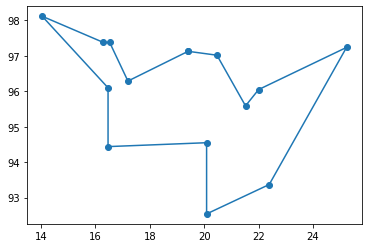

In [9]:
#Display the graph, the list and the length of the best path
sol = best.genomeList
print(sol)
print(fitness(sol))
sol.append(sol[0])
sol_coords = []
sol_lat = []
sol_long = []

for i in range(0,len(sol)):
    sol_coords.append(cities[sol[i]])
    sol_lat.append(LAT[sol[i]])
    sol_long.append(LON[sol[i]])

plt.plot(sol_lat,sol_long, '-o')
plt.show()

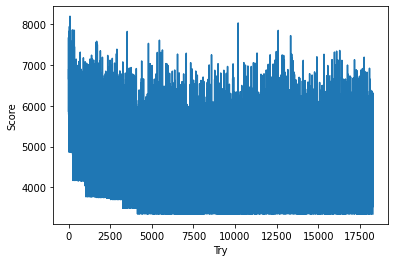

In [10]:
plt.plot(ft_evolve)
plt.xlabel('Try')
plt.ylabel('Score')
plt.show()